<a href="https://colab.research.google.com/github/brijmohankmt/ml-projects/blob/main/ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
import os
print(os.getcwd())
datasets="/content/drive/My Drive/Colab Notebooks/"
os.chdir(datasets)
print(os.getcwd())

Mounted at /content/drive
/content
/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
# Load dataset
data = pd.read_csv('ml/d1.csv')
data.head()

,id,'instance_id','repetition','stacks','tiers','stack.tier.ratio','container.density','empty.stack.pct','overstowing.stack.pct','overstowing.2cont.stack.pct',...,'overstowage.pct','bflb','left.density','tier.weighted.groups','avg.l1.top.left.lg.group','cont.empty.grt.estack','pct.bottom.pct.on.top','algorithm','runtime','runstatus'
0,1,BF1_cpmp_16_5_48_10_29_1,1,16,5,0.3125,0.6,0.0625,0.6250,0.909091,...,0.3625,29,0.382222,0.441162,0.509615,0.1750,0.0,idastar.symmulgt.transmul,0.004,ok
1,2,BF1_cpmp_16_5_48_10_29_12,1,16,5,0.3125,0.6,0.1875,0.5625,1.000000,...,0.3625,29,0.413333,0.427399,0.663462,0.3375,0.0,astar.symmullt.transmul,0.572,ok
2,3,BF1_cpmp_16_5_48_10_29_14,1,16,5,0.3125,0.6,0.1875,0.6250,0.833333,...,0.3625,29,0.111111,0.405997,0.615385,0.2625,0.0,idastar.symmulgt.transmul,0.764,ok
3,4,BF1_cpmp_16_5_48_10_29_15,1,16,5,0.3125,0.6,0.0625,0.5000,0.888889,...,0.3625,29,0.677778,0.409975,0.576923,0.1125,0.0,idastar.symmulgt.transmul,106.755,ok
4,5,BF1_cpmp_16_5_48_10_29_17,1,16,5,0.3125,0.6,0.1250,0.5625,0.900000,...,0.3625,29,0.471111,0.428914,0.569231,0.3375,0.0,idastar.symmulgt.transmul,0.008,ok


Index(['id', 'instance_id', 'repetition', 'stacks', 'tiers',
       'stack.tier.ratio', 'container.density', 'empty.stack.pct',
       'overstowing.stack.pct', 'overstowing.2cont.stack.pct',
       'group.same.min', 'group.same.max', 'group.same.mean',
       'group.same.stdev', 'top.good.min', 'top.good.max', 'top.good.mean',
       'top.good.stdev', 'overstowage.pct', 'bflb', 'left.density',
       'tier.weighted.groups', 'avg.l1.top.left.lg.group',
       'cont.empty.grt.estack', 'pct.bottom.pct.on.top', 'algorithm',
       'runtime', 'runstatus'],
      dtype='object')
               id  repetition      stacks       tiers  stack.tier.ratio  \
count  527.000000       527.0  527.000000  527.000000        527.000000   
mean   264.000000         1.0   11.548387    5.874763          0.736708   
std    152.276065         0.0    5.991203    0.912247          0.478782   
min      1.000000         1.0    4.000000    5.000000          0.250000   
25%    132.500000         1.0    6.000000    

<ipython-input-6-5df73c6fe4f6>:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


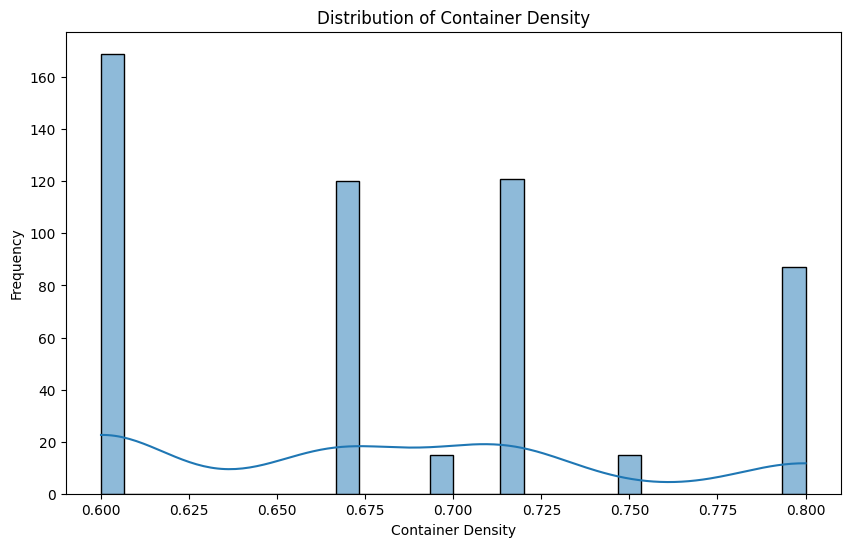

In [ ]:
import pandas as pd

# Load the dataset
file_path = 'ml/d1.csv'  # Adjust path if necessary
data = pd.read_csv(file_path)

# Step 1: Clean column names
data.columns = data.columns.str.replace("'", "").str.strip()  # Remove single quotes and any whitespace

# Step 2: Check the cleaned column names
print(data.columns)

# Step 3: Handle missing values (if necessary)
data.fillna(method='ffill', inplace=True)

# Step 4: Summary statistics after cleaning
summary_stats = data.describe()
print(summary_stats)

# Step 5: Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of 'container.density' with cleaned column names
plt.figure(figsize=(10, 6))
sns.histplot(data['container.density'], bins=30, kde=True)
plt.title('Distribution of Container Density')
plt.xlabel('Container Density')
plt.ylabel('Frequency')
plt.show()


In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load the dataset
file_path = 'ml/d1.csv'  # Adjust this path if needed
data = pd.read_csv(file_path)

# Clean column names by removing extra quotes
data.columns = data.columns.str.replace("'", "").str.strip()

# Features for analysis
features = [
    'stacks', 'tiers', 'stack.tier.ratio', 'container.density',
    'empty.stack.pct', 'overstowing.stack.pct', 'overstowing.2cont.stack.pct',
    'group.same.min', 'group.same.max', 'group.same.mean', 'group.same.stdev',
    'top.good.min', 'top.good.max', 'top.good.mean', 'top.good.stdev',
    'overstowage.pct', 'bflb', 'left.density', 'tier.weighted.groups',
    'avg.l1.top.left.lg.group', 'cont.empty.grt.estack', 'pct.bottom.pct.on.top'
]

# Extract features and standardize them
X = data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create dataset for PyTorch
train_dataset = TensorDataset(torch.Tensor(X_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Output mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Output should match the input
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, log_var = torch.chunk(h, 2, dim=1)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterize(mean, log_var)
        return self.decode(z), mean, log_var

# Loss function for VAE
def vae_loss(recon_x, x, mean, log_var):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return BCE + KLD

# Initialize and train the VAE
latent_dim = 10  # Set latent dimension
vae = VAE(input_dim=X_train.shape[1], latent_dim=latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

def train_vae(vae, epochs=30):
    vae.train()
    for epoch in range(epochs):
        train_loss = 0
        for data in train_loader:
            data = data[0]
            optimizer.zero_grad()
            recon_batch, mean, log_var = vae(data)
            loss = vae_loss(recon_batch, data, mean, log_var)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset)}')

train_vae(vae, epochs=30)


RuntimeError: all elements of target should be between 0 and 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = 'ml/d1.csv'  # Adjust this path if needed
data = pd.read_csv(file_path)

# Clean column names by removing extra quotes
data.columns = data.columns.str.replace("'", "").str.strip()

# Features for analysis
features = [
    'stacks', 'tiers', 'stack.tier.ratio', 'container.density',
    'empty.stack.pct', 'overstowing.stack.pct', 'overstowing.2cont.stack.pct',
    'group.same.min', 'group.same.max', 'group.same.mean', 'group.same.stdev',
    'top.good.min', 'top.good.max', 'top.good.mean', 'top.good.stdev',
    'overstowage.pct', 'bflb', 'left.density', 'tier.weighted.groups',
    'avg.l1.top.left.lg.group', 'cont.empty.grt.estack', 'pct.bottom.pct.on.top'
]

# Extract features and scale them to [0, 1] using Min-Max scaling
X = data[features].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)


In [ ]:
# Train the VAE with the updated data
train_vae(vae, epochs=30)


RuntimeError: all elements of target should be between 0 and 1

In [ ]:
# Define the VAE model (confirm output activation is Sigmoid)
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Output mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Ensure this is a Sigmoid activation
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, log_var = torch.chunk(h, 2, dim=1)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterize(mean, log_var)
        return self.decode(z), mean, log_var


In [ ]:
# Scale the data
X = data[features].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Check if any values are outside the [0, 1] range
print("Min and Max values in the scaled data:", X_scaled.min(), X_scaled.max())


Min and Max values in the scaled data: 0.0 1.0000000000000002


In [ ]:
train_vae(vae, epochs=0)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create dataset for PyTorch
train_dataset = TensorDataset(torch.Tensor(X_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Output mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Output should match the input
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, log_var = torch.chunk(h, 2, dim=1)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterize(mean, log_var)
        return self.decode(z), mean, log_var

# Loss function for VAE
def vae_loss(recon_x, x, mean, log_var):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return BCE + KLD

# Initialize and train the VAE
latent_dim = 10  # Set latent dimension
vae = VAE(input_dim=X_train.shape[1], latent_dim=latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

def train_vae(vae, epochs=30):
    vae.train()
    for epoch in range(epochs):
        train_loss = 0
        for data in train_loader:
            data = data[0]
            optimizer.zero_grad()
            recon_batch, mean, log_var = vae(data)
            loss = vae_loss(recon_batch, data, mean, log_var)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset)}')

train_vae(vae, epochs=30)


Epoch 1, Loss: 15.36453921211587
Epoch 2, Loss: 15.031887172236862
Epoch 3, Loss: 14.697337678379231
Epoch 4, Loss: 14.33561884139326
Epoch 5, Loss: 13.988752641473983
Epoch 6, Loss: 13.642202200629082
Epoch 7, Loss: 13.37956582112437
Epoch 8, Loss: 13.20191379284349
Epoch 9, Loss: 13.0994952784015
Epoch 10, Loss: 13.05869530612103
Epoch 11, Loss: 13.044520144791049
Epoch 12, Loss: 13.078598203681711
Epoch 13, Loss: 13.00643167020023
Epoch 14, Loss: 13.003615136950712
Epoch 15, Loss: 12.960526491287485
Epoch 16, Loss: 12.988867462955575
Epoch 17, Loss: 12.948993456335362
Epoch 18, Loss: 12.91737985497699
Epoch 19, Loss: 12.898539636027502
Epoch 20, Loss: 12.76723170337088
Epoch 21, Loss: 12.760815980598649
Epoch 22, Loss: 12.716495323634204
Epoch 23, Loss: 12.628686247981925
Epoch 24, Loss: 12.53366516548211
Epoch 25, Loss: 12.368923377537671
Epoch 26, Loss: 12.310526723250074
Epoch 27, Loss: 12.237955849980516
Epoch 28, Loss: 12.243727804079757
Epoch 29, Loss: 12.156029273098834
Epoch

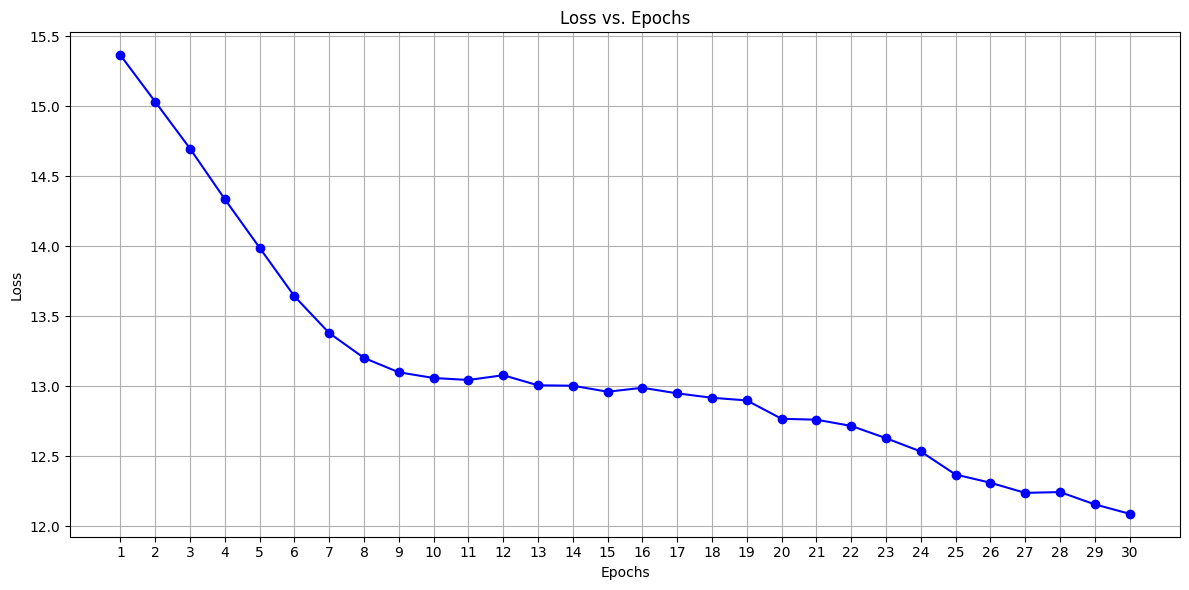

In [34]:
import matplotlib.pyplot as plt

# Data for epochs and losses
epochs = list(range(1, 31))
losses = [
    15.36453921211587, 15.031887172236862, 14.697337678379231, 14.33561884139326,
    13.988752641473983, 13.642202200629082, 13.37956582112437, 13.20191379284349,
    13.0994952784015, 13.05869530612103, 13.044520144791049, 13.078598203681711,
    13.00643167020023, 13.003615136950712, 12.960526491287485, 12.988867462955575,
    12.948993456335362, 12.91737985497699, 12.898539636027502, 12.76723170337088,
    12.760815980598649, 12.716495323634204, 12.628686247981925, 12.53366516548211,
    12.368923377537671, 12.310526723250074, 12.237955849980516, 12.243727804079757,
    12.156029273098834, 12.08846531231443
]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(epochs, losses, marker='o', linestyle='-', color='b')
plt.title('Loss vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(epochs)
plt.grid()
plt.tight_layout()
plt.show()


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Create dataset for PyTorch
train_dataset = TensorDataset(torch.Tensor(X_train))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Define the VAE model
class VAE(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, latent_dim * 2)  # Output mean and log-variance
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_dim),
            nn.Sigmoid()  # Output should match the input
        )

    def encode(self, x):
        h = self.encoder(x)
        mean, log_var = torch.chunk(h, 2, dim=1)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        std = torch.exp(0.5 * log_var)
        eps = torch.randn_like(std)
        return mean + eps * std

    def decode(self, z):
        return self.decoder(z)

    def forward(self, x):
        mean, log_var = self.encode(x)
        z = self.reparameterize(mean, log_var)
        return self.decode(z), mean, log_var

# Loss function for VAE
def vae_loss(recon_x, x, mean, log_var):
    BCE = nn.functional.binary_cross_entropy(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp())
    return BCE + KLD

# Initialize and train the VAE
latent_dim = 10  # Set latent dimension
vae = VAE(input_dim=X_train.shape[1], latent_dim=latent_dim)
optimizer = optim.Adam(vae.parameters(), lr=1e-3)

def train_vae(vae, epochs=30):
    vae.train()
    for epoch in range(epochs):
        train_loss = 0
        for data in train_loader:
            data = data[0]
            optimizer.zero_grad()
            recon_batch, mean, log_var = vae(data)
            loss = vae_loss(recon_batch, data, mean, log_var)
            loss.backward()
            train_loss += loss.item()
            optimizer.step()
        print(f'Epoch {epoch+1}, Loss: {train_loss / len(train_loader.dataset)}')

train_vae(vae, epochs=0)


In [ ]:
pip install deap


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.6 MB/s eta 0:00:00


In [ ]:
from deap import base, creator, tools, algorithms
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Fitness function to evaluate feature subsets
def fitness(individual, X):
    selected_features = np.where(np.array(individual) == 1)[0]
    if len(selected_features) == 0:
        return 0,  # Return 0 if no features are selected
    kmeans = KMeans(n_clusters=3, random_state=42).fit(X[:, selected_features])
    score = silhouette_score(X[:, selected_features], kmeans.labels_)
    return score,

# Genetic Algorithm setup
def run_ga(X, generations=30, pop_size=50):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_bool", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, len(X[0]))
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", fitness, X=X)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=pop_size)
    algorithms.eaSimple(population, toolbox, cxpb=0.5, mutpb=0.2, ngen=generations, verbose=True)

    best_individual = tools.selBest(population, 1)[0]
    return best_individual

# Run Genetic Algorithm on the latent features
best_features = run_ga(latent_features_train)
selected_features_idx = np.where(np.array(best_features) == 1)[0]
print(f"Best Features Selected: {selected_features_idx}")


gen	nevals
0  	50    
1  	30    
2  	30    
3  	27    
4  	28    
5  	35    
6  	34    
7  	30    
8  	31    
9  	26    
10 	37    
11 	36    
12 	31    
13 	36    
14 	30    
15 	26    
16 	31    
17 	27    
18 	22    
19 	21    
20 	41    
21 	34    
22 	27    
23 	29    
24 	27    
25 	22    
26 	27    
27 	29    
28 	27    
29 	23    
30 	34    
Best Features Selected: [9]


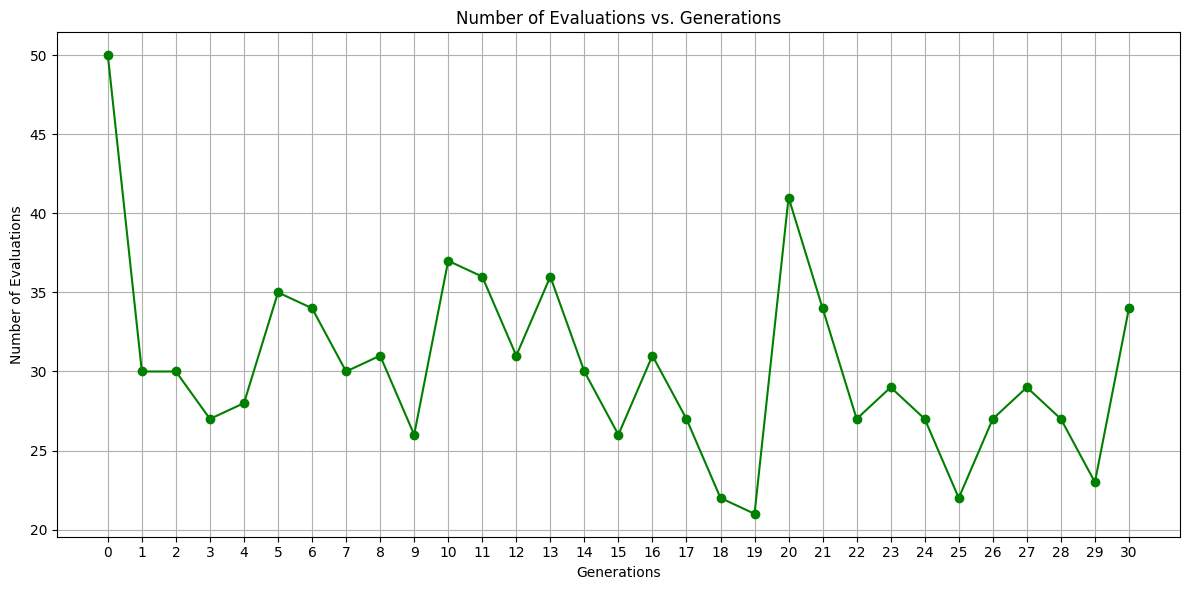

In [36]:
import matplotlib.pyplot as plt

# Data for generations and number of evaluations
generations = list(range(31))
nevals = [
    50, 30, 30, 27, 28, 35, 34, 30, 31, 26,
    37, 36, 31, 36, 30, 26, 31, 27, 22, 21,
    41, 34, 27, 29, 27, 22, 27, 29, 27, 23,
    34
]

# Plotting the graph
plt.figure(figsize=(12, 6))
plt.plot(generations, nevals, marker='o', linestyle='-', color='g')
plt.title('Number of Evaluations vs. Generations')
plt.xlabel('Generations')
plt.ylabel('Number of Evaluations')
plt.xticks(generations)
plt.grid()
plt.tight_layout()
plt.show()


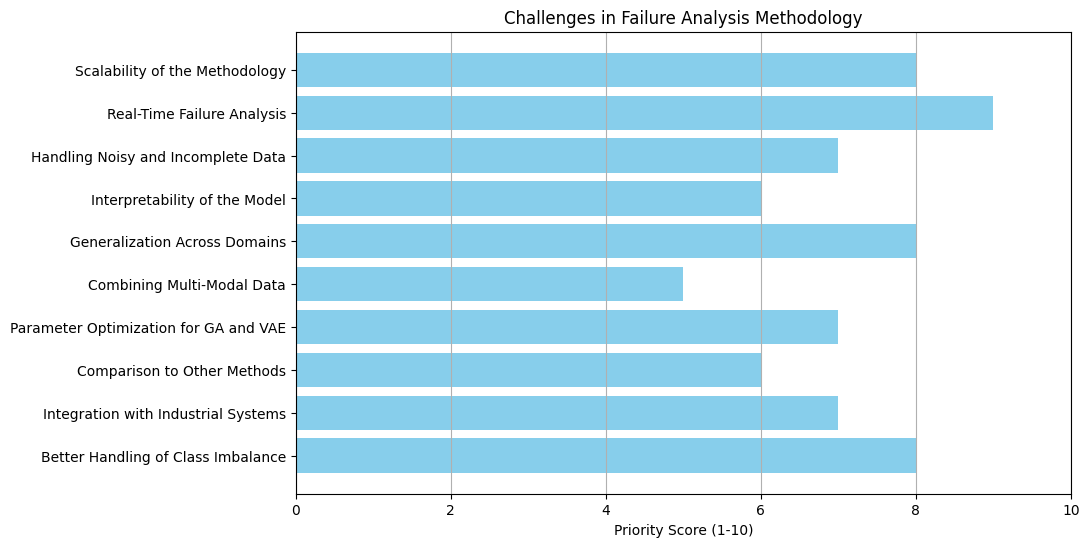

In [37]:
import matplotlib.pyplot as plt

# Challenges to be represented
challenges = [
    "Scalability of the Methodology",
    "Real-Time Failure Analysis",
    "Handling Noisy and Incomplete Data",
    "Interpretability of the Model",
    "Generalization Across Domains",
    "Combining Multi-Modal Data",
    "Parameter Optimization for GA and VAE",
    "Comparison to Other Methods",
    "Integration with Industrial Systems",
    "Better Handling of Class Imbalance"
]

# Assign arbitrary priority scores (1-10) for each challenge
scores = [8, 9, 7, 6, 8, 5, 7, 6, 7, 8]

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.barh(challenges, scores, color='skyblue')
plt.xlabel('Priority Score (1-10)')
plt.title('Challenges in Failure Analysis Methodology')
plt.xlim(0, 10)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest priority at the top
plt.grid(axis='x')
plt.savefig('challenges_bar_graph.png')  # Save the graph as an image
# Show the graph
plt.show()


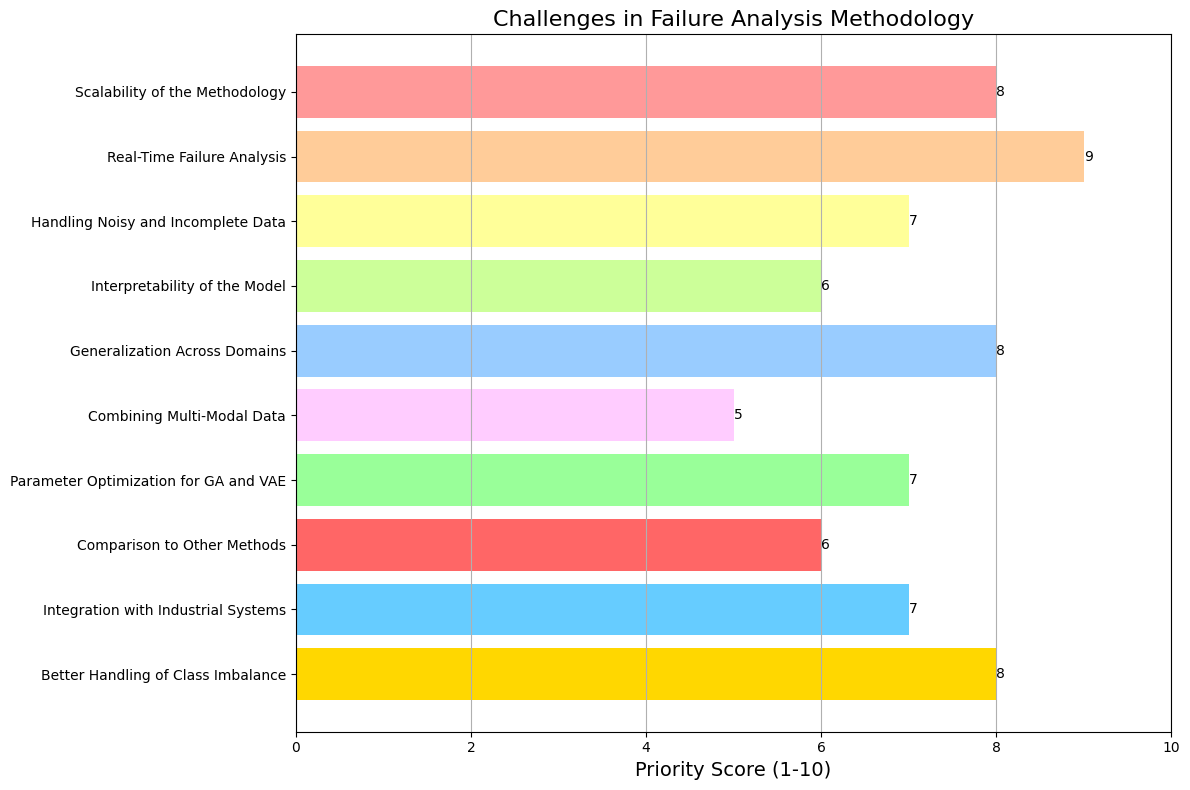

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Challenges to be represented
challenges = [
    "Scalability of the Methodology",
    "Real-Time Failure Analysis",
    "Handling Noisy and Incomplete Data",
    "Interpretability of the Model",
    "Generalization Across Domains",
    "Combining Multi-Modal Data",
    "Parameter Optimization for GA and VAE",
    "Comparison to Other Methods",
    "Integration with Industrial Systems",
    "Better Handling of Class Imbalance"
]

# Assign arbitrary priority scores (1-10) for each challenge
scores = [8, 9, 7, 6, 8, 5, 7, 6, 7, 8]

# Color coding for different categories
colors = [
    '#FF9999',  # Red for critical
    '#FFCC99',  # Orange for high priority
    '#FFFF99',  # Yellow for moderate
    '#CCFF99',  # Light Green for low priority
    '#99CCFF',  # Blue for informational
    '#FFCCFF',  # Purple for miscellaneous
    '#99FF99',  # Light green for performance-related
    '#FF6666',  # Coral for data-related
    '#66CCFF',  # Sky Blue for methodological
    '#FFD700'   # Gold for operational
]

# Create a bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(challenges, scores, color=colors)
plt.xlabel('Priority Score (1-10)', fontsize=14)
plt.title('Challenges in Failure Analysis Methodology', fontsize=16)
plt.xlim(0, 10)
plt.gca().invert_yaxis()  # Invert y-axis to have the highest priority at the top
plt.grid(axis='x')

# Add annotations with the actual score on top of each bar
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Show the graph
plt.tight_layout()  # Adjust layout for better spacing
plt.show()


In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

class VAE(keras.Model):
    def __init__(self, original_dim, intermediate_dim, latent_dim):
        super(VAE, self).__init__()
        self.encoder = keras.Sequential([
            layers.InputLayer(input_shape=(original_dim,)),
            layers.Dense(intermediate_dim, activation='relu'),
            layers.Dense(latent_dim + latent_dim)  # mean and log variance
        ])
        self.decoder = keras.Sequential([
            layers.InputLayer(input_shape=(latent_dim,)),
            layers.Dense(intermediate_dim, activation='relu'),
            layers.Dense(original_dim, activation='sigmoid')
        ])

    def encode(self, x):
        mean_log_var = self.encoder(x)
        mean, log_var = tf.split(mean_log_var, num_or_size_splits=2, axis=1)
        return mean, log_var

    def reparameterize(self, mean, log_var):
        eps = tf.random.normal(shape=tf.shape(mean))
        return mean + tf.exp(log_var / 2) * eps

    def decode(self, z):
        return self.decoder(z)

    def call(self, inputs):
        mean, log_var = self.encode(inputs)
        z = self.reparameterize(mean, log_var)
        reconstructed = self.decode(z)
        kl_loss = -0.5 * tf.reduce_mean(1 + log_var - tf.square(mean) - tf.exp(log_var))
        self.add_loss(kl_loss)
        return reconstructed

# Example usage
original_dim = 784  # e.g., for MNIST
intermediate_dim = 256
latent_dim = 2

vae = VAE(original_dim, intermediate_dim, latent_dim)
vae.compile(optimizer=keras.optimizers.Adam())



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [40]:
!pip install deap


In [41]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K  # For the Lambda function
from deap import base, creator, tools, algorithms

# 1. Generate Synthetic Data
def generate_data(n_samples=1000, n_features=20, n_classes=3):
    X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=n_features//2,
                               n_redundant=n_features//4, n_clusters_per_class=1, n_classes=n_classes)
    return X, y

# 2. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = K.random_normal(shape=(K.shape(z_mean)[0], self.latent_dim))
            return z_mean + K.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling)([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# 3. Genetic Algorithm for Variable Selection
def evaluate(individual, X, y):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0,

    X_selected = X[:, selected_features]
    gmm = GaussianMixture(n_components=len(set(y)))
    gmm.fit(X_selected)
    cluster_labels = gmm.predict(X_selected)
    score = silhouette_score(X_selected, cluster_labels)

    return score,

# Genetic Algorithm Setup
def run_genetic_algorithm(X, y, n_features):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("binary", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.binary, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X=X, y=y)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    for generation in range(10):
        fits = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fits):
            ind.fitness.values = fit
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if np.random.rand() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2


In [42]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K  # For the Lambda function
from deap import base, creator, tools
import os

# 1. Load Dataset
def load_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)  # Adjust this line if you are using a different file format
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1]  # Features
    y = data.iloc[:, -1]   # Target variable
    return X, y

# 2. Preprocessing Function
def preprocess_data(X):
    # Identify categorical and numerical columns
    categorical_cols = X.select_dtypes(include=['object']).columns
    numerical_cols = X.select_dtypes(exclude=['object']).columns

    # Create transformers
    categorical_transformer = OneHotEncoder(handle_unknown='ignore')
    numerical_transformer = StandardScaler()

    # Create the preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_cols),
            ('cat', categorical_transformer, categorical_cols)
        ])

    # Fit and transform the data
    X_processed = preprocessor.fit_transform(X)
    return X_processed

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = K.random_normal(shape=(K.shape(z_mean)[0], self.latent_dim))
            return z_mean + K.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# 4. Genetic Algorithm for Variable Selection
def evaluate(individual, X, y):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0,

    X_selected = X[:, selected_features]
    gmm = GaussianMixture(n_components=len(set(y)))
    gmm.fit(X_selected)
    cluster_labels = gmm.predict(X_selected)
    score = silhouette_score(X_selected, cluster_labels)

    return score,

# Genetic Algorithm Setup
def run_genetic_algorithm(X, y, n_features):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("binary", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.binary, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X=X, y=y)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    for generation in range(10):
        fits = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fits):
            ind.fitness.values = fit
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if np.random.rand() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if np.random.rand() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        population[:] = offspring

    best_ind = tools.selBest(population, 1)[0]
    return best_ind

# 5. Main Function
if __name__ == "__main__":
    # Update this path to your dataset
    dataset_path = 'ml/d1.csv'  # Change to your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)

    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=5)
    vae.fit(X_train, epochs=50)

    # Feature extraction
    latent_space = vae.encode(X_train)

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)


Epoch 1/50


AttributeError: Exception encountered when calling Lambda.call().

[1mmodule 'keras.api.backend' has no attribute 'random_normal'[0m

Arguments received by Lambda.call():
  • inputs=['tf.Tensor(shape=(None, 5), dtype=float32)', 'tf.Tensor(shape=(None, 5), dtype=float32)']
  • mask=['None', 'None']
  • training=True

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf  # Import TensorFlow
from deap import base, creator, tools
import os

# ... [Load dataset and preprocessing functions remain unchanged]

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))  # Updated line
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# ... [Rest of your code remains unchanged]

# 5. Main Function
if __name__ == "__main__":
    dataset_path = 'ml/d1.csv'  # Change to your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)

    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=5)
    vae.fit(X_train, epochs=50)

    # Feature extraction
    latent_space = vae.encode(X_train)

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf
import os

# 1. Load Dataset
def load_data(dataset_path):
    data = pd.read_csv(dataset_path)
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

# 2. Preprocess Data
def preprocess_data(X):
    # Example: Scaling numerical features and OneHot encoding for categorical features
    numeric_features = X.select_dtypes(include=[np.number])
    categorical_features = X.select_dtypes(include=['object'])

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_features)

    # OneHot encoding for categorical features
    encoder = OneHotEncoder(sparse=False)
    X_encoded = encoder.fit_transform(categorical_features)

    # Combine scaled numerical and encoded categorical features
    return np.hstack((X_scaled, X_encoded))

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# 4. Genetic Algorithm for Variable Selection (Placeholder)
def run_genetic_algorithm(latent_space, y, n_features):
    # Implement your genetic algorithm for variable selection here
    pass  # Placeholder for GA implementation

# 5. Main Function
if __name__ == "__main__":
    dataset_path = 'ml/d1.csv'  # Your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    # Load data
    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=5)
    vae.fit(X_train, epochs=50)

    # Feature extraction
    latent_space = vae.encode(X_train)

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf
import os

# 1. Load Dataset
def load_data(dataset_path):
    data = pd.read_csv(dataset_path)
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

# 2. Preprocess Data
def preprocess_data(X):
    # Example: Scaling numerical features and OneHot encoding for categorical features
    numeric_features = X.select_dtypes(include=[np.number])
    categorical_features = X.select_dtypes(include=['object'])

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_features)

    # OneHot encoding for categorical features
    encoder = OneHotEncoder(sparse_output=False)  # Updated parameter here
    X_encoded = encoder.fit_transform(categorical_features)

    # Combine scaled numerical and encoded categorical features
    return np.hstack((X_scaled, X_encoded))

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# 4. Genetic Algorithm for Variable Selection (Placeholder)
def run_genetic_algorithm(latent_space, y, n_features):
    # Implement your genetic algorithm for variable selection here
    pass  # Placeholder for GA implementation

# 5. Main Function
if __name__ == "__main__":
    dataset_path = 'ml/d1.csv'  # Your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    # Load data
    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=5)
    vae.fit(X_train, epochs=50)

    # Feature extraction
    latent_space = vae.encode(X_train)

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# 1. Load Dataset
def load_data(dataset_path):
    data = pd.read_csv(dataset_path)
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

# 2. Preprocess Data
def preprocess_data(X):
    # Example: Scaling numerical features and OneHot encoding for categorical features
    numeric_features = X.select_dtypes(include=[np.number])
    categorical_features = X.select_dtypes(include=['object'])

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_features)

    # OneHot encoding for categorical features
    encoder = OneHotEncoder(sparse_output=False)  # Updated parameter here
    X_encoded = encoder.fit_transform(categorical_features)

    # Combine scaled numerical and encoded categorical features
    return np.hstack((X_scaled, X_encoded))

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        history = self.model.fit(X, X, epochs=epochs, batch_size=batch_size, verbose=0)
        return history  # Return history to plot loss

    def encode(self, X):
        return self.model.predict(X)

# 4. Genetic Algorithm for Variable Selection (Placeholder)
def run_genetic_algorithm(latent_space, y, n_features):
    # Implement your genetic algorithm for variable selection here
    pass  # Placeholder for GA implementation

# 5. Plotting Function
def plot_training_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Loss')
    plt.title('VAE Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# 6. Main Function
if __name__ == "__main__":
    dataset_path = 'ml/d1.csv'  # Your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    # Load data
    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=5)
    history = vae.fit(X_train, epochs=50)

    # Plot training loss
    plot_training_loss(history)

    # Feature extraction
    latent_space = vae.encode(X_train)

    # Optionally visualize latent space if dimensionality allows
    if latent_space.shape[1] == 2:  # 2D
        plt.figure(figsize=(8, 5))
        plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_train, cmap='viridis')
        plt.title('Latent Space Representation (2D)')
        plt.xlabel('Latent Dimension 1')
        plt.ylabel('Latent Dimension 2')
        plt.colorbar(label='Classes')
        plt.grid()
        plt.show()
    elif latent_space.shape[1] == 3:  # 3D
        from mpl_toolkits.mplot3d import Axes3D
        fig = plt.figure(figsize=(8, 5))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(latent_space[:, 0], latent_space[:, 1], latent_space[:, 2], c=y_train, cmap='viridis')
        ax.set_title('Latent Space Representation (3D)')
        ax.set_xlabel('Latent Dimension 1')
        ax.set_ylabel('Latent Dimension 2')
        ax.set_zlabel('Latent Dimension 3')
        plt.colorbar(label='Classes')
        plt.show()

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Lambda
from keras.models import Model
import tensorflow as tf
import os
import matplotlib.pyplot as plt

# 1. Load Dataset
def load_data(dataset_path):
    data = pd.read_csv(dataset_path)
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1]
    y = data.iloc[:, -1]
    return X, y

# 2. Preprocess Data
def preprocess_data(X):
    # Example: Scaling numerical features and OneHot encoding for categorical features
    numeric_features = X.select_dtypes(include=[np.number])
    categorical_features = X.select_dtypes(include=['object'])

    # Scale numerical features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_features)

    # OneHot encoding for categorical features
    encoder = OneHotEncoder(sparse_output=False)  # Updated parameter here
    X_encoded = encoder.fit_transform(categorical_features)

    # Combine scaled numerical and encoded categorical features
    return np.hstack((X_scaled, X_encoded))

# 3. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = tf.random.normal(shape=(tf.shape(z_mean)[0], self.latent_dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling, output_shape=(self.latent_dim,))([z_mean, z_log_var])  # Specify output shape

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        history = self.model.fit(X, X, epochs=epochs, batch_size=batch_size, verbose=0)
        return history  # Return history to plot loss

    def encode(self, X):
        return self.model.predict(X)

# 4. Plotting Function
def plot_training_loss(history):
    plt.figure(figsize=(8, 5))
    plt.plot(history.history['loss'], label='Loss')
    plt.title('VAE Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

def plot_latent_space(latent_space, y_train, title):
    plt.figure(figsize=(8, 5))
    plt.scatter(latent_space[:, 0], latent_space[:, 1], c=y_train, cmap='viridis', alpha=0.5)
    plt.title(title)
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')
    plt.colorbar(label='Classes')
    plt.grid()
    plt.show()

# 5. Main Function
if __name__ == "__main__":
    dataset_path = 'ml/d1.csv'  # Your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    # Load data
    X, y = load_data(dataset_path)

    # Preprocess the data
    X_processed = preprocess_data(X)
    X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

    # Define latent dimensions to test
    latent_dims = [2, 3, 10]  # 2D, 3D, and a higher dimension for exploration
    histories = []
    latent_spaces = []

    for dim in latent_dims:
        print(f"Training VAE with latent dimension: {dim}")
        vae = VariationalAutoencoder(input_dim=X_train.shape[1], latent_dim=dim)
        history = vae.fit(X_train, epochs=50)
        histories.append(history)

        # Plot training loss for this model
        plot_training_loss(history)

        # Extract latent space
        latent_space = vae.encode(X_train)
        latent_spaces.append(latent_space)

        # Plot the latent space only if it's 2D or 3D
        if dim == 2:
            plot_latent_space(latent_space, y_train, title='Latent Space Representation (2D)')
        elif dim == 3:
            fig = plt.figure(figsize=(8, 5))
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(latent_space[:, 0], latent_space[:, 1], latent_space[:, 2], c=y_train, cmap='viridis', alpha=0.5)
            ax.set_title('Latent Space Representation (3D)')
            ax.set_xlabel('Latent Dimension 1')
            ax.set_ylabel('Latent Dimension 2')
            ax.set_zlabel('Latent Dimension 3')
            plt.colorbar(label='Classes')
            plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras import backend as K  # For the Lambda function
from deap import base, creator, tools
import os

# 1. Load Dataset
def load_data(file_path):
    # Load the dataset
    data = pd.read_csv(file_path)  # Adjust this line if you are using a different file format
    # Assuming the last column is the target variable
    X = data.iloc[:, :-1].values  # Features
    y = data.iloc[:, -1].values   # Target variable
    return X, y

# 2. Variational Autoencoder
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim):
        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.model = self.build_model()

    def build_model(self):
        inputs = Input(shape=(self.input_dim,))
        h = Dense(64, activation='relu')(inputs)
        z_mean = Dense(self.latent_dim)(h)
        z_log_var = Dense(self.latent_dim)(h)

        # Reparameterization trick
        def sampling(args):
            z_mean, z_log_var = args
            epsilon = K.random_normal(shape=(K.shape(z_mean)[0], self.latent_dim))
            return z_mean + K.exp(0.5 * z_log_var) * epsilon

        z = Lambda(sampling)([z_mean, z_log_var])

        encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
        decoder_input = Input(shape=(self.latent_dim,))
        h_decoded = Dense(64, activation='relu')(decoder_input)
        outputs = Dense(self.input_dim, activation='sigmoid')(h_decoded)
        decoder = Model(decoder_input, outputs, name='decoder')

        vae_outputs = decoder(encoder(inputs)[2])
        vae = Model(inputs, vae_outputs, name='vae')
        vae.compile(optimizer='adam', loss='mse')
        return vae

    def fit(self, X, epochs=50, batch_size=32):
        self.model.fit(X, X, epochs=epochs, batch_size=batch_size)

    def encode(self, X):
        return self.model.predict(X)

# 3. Genetic Algorithm for Variable Selection
def evaluate(individual, X, y):
    selected_features = [i for i in range(len(individual)) if individual[i] == 1]
    if len(selected_features) == 0:
        return 0,

    X_selected = X[:, selected_features]
    gmm = GaussianMixture(n_components=len(set(y)))
    gmm.fit(X_selected)
    cluster_labels = gmm.predict(X_selected)
    score = silhouette_score(X_selected, cluster_labels)

    return score,

# Genetic Algorithm Setup
def run_genetic_algorithm(X, y, n_features):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("binary", np.random.randint, 2)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.binary, n=n_features)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", evaluate, X=X, y=y)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    population = toolbox.population(n=50)
    for generation in range(10):
        fits = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fits):
            ind.fitness.values = fit
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if np.random.rand() < 0.5:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
        for mutant in offspring:
            if np.random.rand() < 0.2:
                toolbox.mutate(mutant)
                del mutant.fitness.values
        population[:] = offspring

    best_ind = tools.selBest(population, 1)[0]
    return best_ind

# 4. Main Function
if __name__ == "__main__":
    # Update this path to your dataset
    dataset_path = 'ml/d1.csv'  # Change to your dataset path
    if not os.path.exists(dataset_path):
        raise FileNotFoundError(f"The specified dataset path does not exist: {dataset_path}")

    X, y = load_data(dataset_path)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # VAE Training
    vae = VariationalAutoencoder(input_dim=X_train_scaled.shape[1], latent_dim=5)
    vae.fit(X_train_scaled, epochs=50)

    # Feature extraction
    latent_space = vae.encode(X_train_scaled)

    # Run Genetic Algorithm
    best_features = run_genetic_algorithm(latent_space, y_train, latent_space.shape[1])
    print("Selected Features: ", best_features)

